<a href="https://colab.research.google.com/github/HugoGom/Kaggle/blob/master/Aula7C%C3%B3pia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic 7

In [0]:
import pandas as pd
import seaborn as sns
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Roteiro

1. Escolha uma classe de modelo importando do Scikit.
2. Escolha os hiperparâmetros do modelo instanciando a classe escolhida em 1.
3. Organize os dados em uma *feature matrix* e um *target array*.
4. Ajuste o modelo invocando o método **fit()**.
5. Aplique o modelo aos novos dados usando **predict()**.

## Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB # 1. Escolha do modelo.
model_bayes = GaussianNB()                 # 2. Escolha dos hiperparâmetros e intanciação.

In [0]:
# 3.1 Feature Matrix
X_df_train = df_train.loc[: ,  ["Sex",	"Embarked", "Age", "Pclass"	] ]
X_df_train.head()

,Sex,Embarked,Age,Pclass
0,male,S,22.0,3
1,female,C,38.0,1
2,female,S,26.0,3
3,female,S,35.0,1
4,male,S,35.0,3


In [0]:
# 3.2 Target Array
y_df_train = df_train.Survived
y_df_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [0]:
sns.pairplot(df_train, hue = 'Survived')
X_df_train = df_train.loc[: ,  ["Sex"] ]
X_df_train.head()

In [0]:
# 3.3 Separação do Banco de Dados
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_df_train, y_df_train, random_state=2020)

In [0]:
# 4 Ajuste o modelo aos dados
model_bayes.fit(X_df_train, y_df_train)

ValueError: ignored

In [0]:
# 5 Faça predições em dados novos
y_model_bayes = model_bayes.predict(Xtest)

NotFittedError: ignored

In [0]:
y_model_bayes

NameError: ignored

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model_bayes)

NameError: ignored

## Regressão Logística (Classificação)

In [0]:
from sklearn.tree import DecisionTreeClassifier  # 1
model_decisiont = DecisionTreeClassifier()       # 2
                                                 # 3    
model_decisiont.fit(Xtrain, ytrain)              # 4

ValueError: ignored

In [0]:
# 5 Faça predições em dados novos
y_model_decisiont = model_decisiont.predict(Xtest)

In [0]:
#y_model_decisiont
#y_model_bayes
# ytest
accuracy_score(ytest, y_model_bayes)

In [0]:
accuracy_score(ytest, y_model_decisiont)

## Análise dos Resultados (matriz de confusão)

### Nayve Bayes

In [0]:
from sklearn.metrics import confusion_matrix

mat_bayes = confusion_matrix(ytest, y_model_bayes) 

NameError: ignored

Text(83.40000000000006, 0.5, 'Valores Reais')

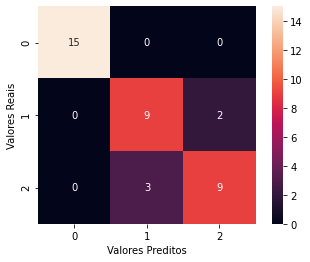

In [0]:
import matplotlib.pyplot as plt

sns.heatmap(mat_bayes, square=True, annot = True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

### Decision Tree


Text(83.40000000000006, 0.5, 'Valores Reais')

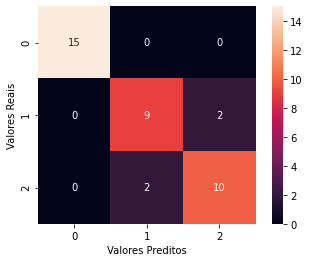

In [0]:
mat_decisiont = confusion_matrix(ytest, y_model_decisiont)
sns.heatmap(mat_decisiont, square=True, annot = True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

## Cross-Validation


In [0]:
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
model_neighbors = KNeighborsClassifier(n_neighbors=1)
cross_val_score(model_neighbors, X_iris, y_iris, cv = 5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [0]:
model_bayes_cv = GaussianNB()                 # 2. Escolha dos hiperparâmetros e intanciação.
cross_val_score(model_bayes_cv, X_iris, y_iris, cv = 5)

array([0.93333333, 0.96666667, 0.93333333, 0.93333333, 1.        ])

### Leave One Out

In [0]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model_bayes_cv, X_iris, y_iris, cv=LeaveOneOut())

In [0]:
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [0]:
scores.mean()

0.9533333333333334